In [1]:
import deepsudoku
import os
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import deepsudoku.reinforcement_learning
from deepsudoku.reinforcement_learning import majority_vote

os.chdir(deepsudoku.REPO_PATH)

from reinforcement_exp.single_action_architectures import *

Sudoku Environment avaible at gymnasium as 'Sudoku-v0'.


In [2]:
env = gym.make("Sudoku-x1", upper_bound_missing_digist = 20)

agent = OnlyConvSeperateValue(True).cuda()
agent.load_state_dict(torch.load("reinforcement_exp/runs/Sudoku-x1__Best_Model_x1_20__1__1693321626/final_model.pth"))

obs, _ = env.reset()

In [5]:
def pi(obs  : np.ndarray) -> tuple:
    
    obs = torch.tensor(obs).float().to("cuda")


    action = agent.get_greedy_action(obs)[0]

    action = np.unravel_index(action.cpu().numpy(),(9,9,9))
    
    return action

In [7]:
%%timeit
majority_vote.majority_vote(pi, obs, 20)

21.1 ms ± 763 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def eval_majority():
    
    obs, _ = env.reset()
    
    terminated = False
    episodic_reward = 0
    episode_length = 0
    
    while not terminated:
        
        action = agent.get_greedy_action(obs)[0]

        action = majority_vote.majority_vote(pi, obs, 20)
        
        obs, reward, terminated , _, _ = env.step(action)

        episodic_reward += reward

        if terminated:
            
            return episodic_reward, episode_length
    
        episode_length += 1

In [3]:
def eval_greedy():
    
    obs, _ = env.reset()
    obs = torch.tensor(obs)[None,:].float().to("cuda")
    
    terminated = False
    episodic_reward = 0
    episode_length = 0
    
    while not terminated:
        
        action = agent.get_greedy_action(obs)[0]

        action = np.unravel_index(action.cpu().numpy(),(9,9,9))

        obs, reward, terminated , _, _ = env.step(action)

        episodic_reward += reward

        if terminated:
            
            return episodic_reward, episode_length
            
        obs = torch.tensor(obs)[None,:].float().to("cuda")

        episode_length += 1
        
        
def eval_cat():
    
    obs, _ = env.reset()
    obs = torch.tensor(obs)[None,:].float().to("cuda")
    
    terminated = False
    episodic_reward = 0
    episode_length = 0
    
    while not terminated:
        
        action = agent.get_action_and_value(obs)[0][0]

        action = np.unravel_index(action.cpu().numpy(),(9,9,9))
        obs, reward, terminated , _, _ = env.step(action)

        episodic_reward += reward

        if terminated:
            
            return episodic_reward, episode_length
            
        obs = torch.tensor(obs)[None,:].float().to("cuda")

        episode_length += 1
        

100%|██████████| 1000/1000 [00:16<00:00, 61.45it/s]


(array([ 33.,  38.,  33.,  35.,  39.,  34.,  31.,  28.,  29.,  33.,  64.,
         74.,  90., 125., 116.,  73.,  61.,  37.,  27.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 19 artists>)

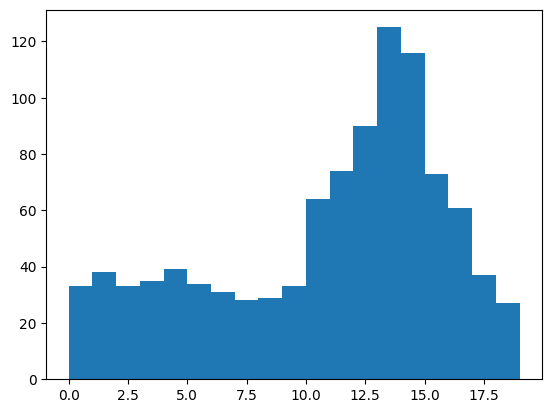

In [5]:
rewards = []
lengths = []

for _ in tqdm.tqdm(range(1000)):
    
    episodic_reward, episode_length = eval_cat()
    rewards.append(episodic_reward)
    lengths.append(episode_length)

plt.hist(lengths, bins = 19)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:07<00:00, 129.56it/s]


(array([116.,  79., 101., 132., 178., 176., 133.,  61.,  17.,   7.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

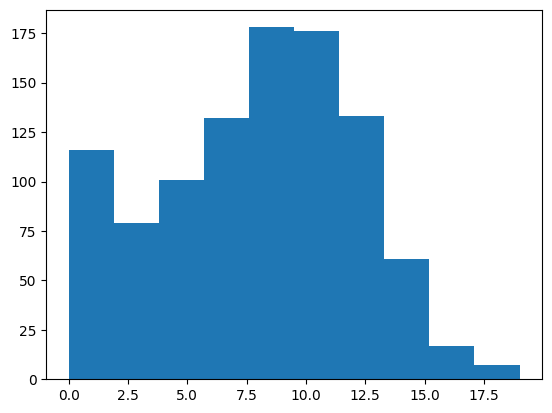

In [6]:
env = gym.make("Sudoku-x2")

agent = OnlyConvSeperateValue(True).cuda()
agent.load_state_dict(torch.load("reinforcement_exp/runs/Sudoku-x2__Best_Model_x2_easy__1__1693322907/final_model.pth"))

obs, _ = env.reset()
obs = torch.tensor(obs)[None,:].float().to("cuda")


rewards = []
lengths = []

for _ in tqdm.tqdm(range(1000)):
    
    episodic_reward, episode_length = eval_greedy()
    rewards.append(episodic_reward)
    lengths.append(episode_length)

plt.hist(lengths,)